<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

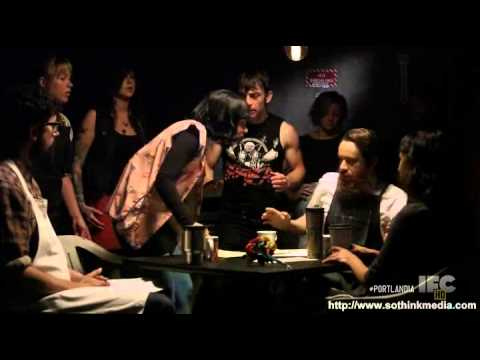

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'/mnt/c/Users/shoot/Documents/Assignments/Unit-4-Sprint-1'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/jacob-desselles/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Much cleaner
shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x: x.lower())
shops['coffee_shop_name'].value_counts()

epoch coffee                            400
halcyon                                 300
the factory - cafe with a soul          244
houndstooth coffee                      200
venezia italian gelato                  200
                                       ... 
lucky lab coffee                         25
sister coffee                            17
kowabunga coffee                         16
the marvelous vintage tea party co.      10
lola savannah coffee downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
import re
def tokenator(text):
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens

In [7]:
pip install spacy

     |████████████████████████████████| 9.9 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 2.8 MB/s eta 0:00:01
  Using cached wasabi-0.7.0.tar.gz (22 kB)
     |████████████████████████████████| 185 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 3.2 MB/s eta 0:00:01
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
     |████████████████████████████████| 3.7 MB 1.7 MB/s eta 0:00:01
  Created wheel for wasabi: filename=wasabi-0.7.0-py3-none-any.whl size=20832 sha256=7e9ed03152dc99af2f448f97abff2ed7646246e86253265872986df52fa16104
  Stored in directory: /home/shuulaces/.cache/pip/wheels/7f/14/56/4339536b2a4a77b537f83c8f08b6115b3b945c9d2b2455ae99
Successfully built wasabi
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install nltk

     |████████████████████████████████| 1.4 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 673 kB 3.3 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=12aeaf0e561f00d4d34906c119e8d7f9cd24a526e205928a6f35d7bb6ddfdc10
  Stored in directory: /home/shuulaces/.cache/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [7]:
from collections import Counter
import spacy
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
shops['tokens'] = shops['full_review_text'].apply(tokenator)
word_count = Counter()
shops['tokens'].apply(lambda x: word_count.update(x))


0       None
1       None
2       None
3       None
4       None
        ... 
7611    None
7612    None
7613    None
7614    None
7615    None
Name: tokens, Length: 7616, dtype: object

In [8]:
word_count.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [9]:
shops['date'] = pd.to_datetime(shops['full_review_text'])
shops

ParserError: Unknown string format:  11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 

In [14]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with..."


In [15]:
import spacy
nlp = spacy.load('en_core_web_lg')

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [12]:

tokens = []
for doc in nlp.pipe(shops['full_review_text']):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
        
    tokens.append(doc_tokens)
shops['tokens'] = tokens
shops['tokens'].head()

NameError: name 'nlp' is not defined

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

